# kNN: k Nearest Neighbor for carbon and silicon isotopes

In [5]:
# Imports
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

## Read the CSV file

In [7]:
# Read the csv file into a pandas DataFrame
carbon_silicon = pd.read_csv('presolargrains_C_Si2.csv')
carbon_silicon.head()

,Type,carbon_isotopes,silicon_29_28,silicon_30_28
0,C,1.300,313.0,377.0
1,AB,1.420,-59.0,19.0
2,AB,1.854,8.0,56.0
3,AB,1.880,20.0,33.0
4,AB,1.910,9.0,103.0


In [8]:
# Set Type for y value
X = carbon_silicon.drop("Type", axis=1)
y = carbon_silicon['Type'].values.reshape(-1, 1)
target_names = ["AB", "C", "M", "N", "U", "X", "Y", "Z"]
print(X.shape, y.shape)

(14423, 3) (14423, 1)


In [9]:
# Label Encoder and Transform
label_encoder = LabelEncoder()

data = X.copy()

label_encoder.fit(data['carbon_isotopes'])
label_encoder.transform(data.carbon_isotopes)
label_encoder.fit(data['silicon_29_28'])
label_encoder.transform(data.silicon_29_28)
label_encoder.fit(data['silicon_30_28'])
label_encoder.transform(data.silicon_30_28)
label_encoder.classes_


array([-770., -719., -705., ..., 2882., 3287., 5650.])

## Create Train Test Split

In [10]:
# Separate data into train and test buckets
data_train, data_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

## Scale the data using MinMaxScalar

In [11]:
# MinMaxScalar
data_minmax = MinMaxScaler().fit(data_train)

data_train_minmax = data_minmax.transform(data_train)
data_test_minmax = data_minmax.transform(data_test)


## Find the best k value

In [12]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    #knn.fit(X_train_minmax, y_train_minmax)
    #train_score = knn.score(X_train_minmax, y_train_minmax)
    #test_score = knn.score(X_test_minmax, y_test_minmax)
    knn.fit(data_train_minmax, y_train)
    train_score = knn.score(data_train_minmax, y_train)
    test_score = knn.score(data_test_minmax, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.942
k: 3, Train/Test Score: 0.969/0.948
k: 5, Train/Test Score: 0.963/0.949
k: 7, Train/Test Score: 0.961/0.950
k: 9, Train/Test Score: 0.959/0.949
k: 11, Train/Test Score: 0.957/0.949
k: 13, Train/Test Score: 0.955/0.951
k: 15, Train/Test Score: 0.954/0.949
k: 17, Train/Test Score: 0.952/0.949
k: 19, Train/Test Score: 0.951/0.948


## Plot the train and test scores

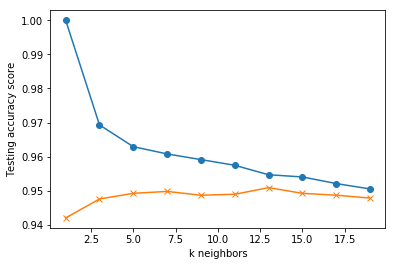

In [13]:
# Plot train scores in blue with marker 'o' and test scores in orange with marker 'x'
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

## Train the model and return the test score

In [15]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(data_train_minmax, y_train)
print('k=13 Test Acc: %.3f' % knn.score(data_test_minmax, y_test))

k=13 Test Acc: 0.951


## Save the model

In [16]:
# Save model to file
filename = 'kNN_C_Si.sav'
joblib.dump(knn, filename)

['kNN_C_Si.sav']

## Summary:

### k Nearest Neighbor carbon and silicon (k=13): 94.9%